In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import math
import keras
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [2]:
#Importing the data
train = pd.read_csv('RUSSEL2000TRAIN.csv')
train

,Date,Open,High,Low,Close,Adj Close,Volume
0,05/01/2017,1387.709961,1387.709961,1366.569946,1371.939941,1371.939941,3761820000
1,06/01/2017,1372.489990,1375.060059,1366.819946,1367.280029,1367.280029,3339890000
2,09/01/2017,1367.130005,1367.130005,1356.540039,1357.489990,1357.489990,3217610000
3,10/01/2017,1357.739990,1371.500000,1357.739990,1370.900024,1370.900024,3638790000
4,11/01/2017,1370.890015,1375.540039,1365.140015,1373.300049,1373.300049,3620410000
...,...,...,...,...,...,...,...
1001,28/12/2020,2013.489990,2026.239990,1996.250000,1996.250000,1996.250000,3527460000
1002,29/12/2020,1996.729980,2001.699951,1950.819946,1959.359985,1959.359985,3387030000
1003,30/12/2020,1961.719971,1987.780029,1961.719971,1979.989990,1979.989990,3145200000
1004,31/12/2020,1979.930054,1981.410034,1963.260010,1974.859985,1974.859985,3172510000


In [3]:
test= pd.read_csv('RUSSEL2000TEST.csv')
test

,Date,Open,High,Low,Close,Adj Close,Volume
0,01/12/2021,2203.120117,2253.370117,2147.399902,2147.419922,2147.419922,4078260000
1,02/12/2021,2147.620117,2211.659912,2147.620117,2206.330078,2206.330078,3771510000
2,03/12/2021,2207.060059,2216.179932,2143.120117,2159.310059,2159.310059,3971500000
3,06/12/2021,2160.159912,2218.270020,2154.620117,2203.479980,2203.479980,3305690000
4,07/12/2021,2206.770020,2271.709961,2206.770020,2253.790039,2253.790039,3334320000
5,08/12/2021,2254.310059,2276.750000,2248.239990,2271.709961,2271.709961,3061550000
6,09/12/2021,2270.270020,2270.270020,2220.179932,2220.209961,2220.209961,2851660000
7,10/12/2021,2221.429932,2240.379883,2200.100098,2211.810059,2211.810059,2858310000
8,13/12/2021,2211.590088,2211.590088,2169.010010,2180.500000,2180.500000,3322050000
9,14/12/2021,2178.919922,2189.709961,2153.209961,2159.649902,2159.649902,3292740000


In [4]:
train.describe

<bound method NDFrame.describe of             Date         Open         High          Low        Close  \
0     05/01/2017  1387.709961  1387.709961  1366.569946  1371.939941   
1     06/01/2017  1372.489990  1375.060059  1366.819946  1367.280029   
2     09/01/2017  1367.130005  1367.130005  1356.540039  1357.489990   
3     10/01/2017  1357.739990  1371.500000  1357.739990  1370.900024   
4     11/01/2017  1370.890015  1375.540039  1365.140015  1373.300049   
...          ...          ...          ...          ...          ...   
1001  28/12/2020  2013.489990  2026.239990  1996.250000  1996.250000   
1002  29/12/2020  1996.729980  2001.699951  1950.819946  1959.359985   
1003  30/12/2020  1961.719971  1987.780029  1961.719971  1979.989990   
1004  31/12/2020  1979.930054  1981.410034  1963.260010  1974.859985   
1005  04/01/2021  1975.780029  1990.699951  1927.150024  1945.910034   

        Adj Close      Volume  
0     1371.939941  3761820000  
1     1367.280029  3339890000  
2    

In [5]:
test.describe

<bound method NDFrame.describe of           Date         Open         High          Low        Close  \
0   01/12/2021  2203.120117  2253.370117  2147.399902  2147.419922   
1   02/12/2021  2147.620117  2211.659912  2147.620117  2206.330078   
2   03/12/2021  2207.060059  2216.179932  2143.120117  2159.310059   
3   06/12/2021  2160.159912  2218.270020  2154.620117  2203.479980   
4   07/12/2021  2206.770020  2271.709961  2206.770020  2253.790039   
5   08/12/2021  2254.310059  2276.750000  2248.239990  2271.709961   
6   09/12/2021  2270.270020  2270.270020  2220.179932  2220.209961   
7   10/12/2021  2221.429932  2240.379883  2200.100098  2211.810059   
8   13/12/2021  2211.590088  2211.590088  2169.010010  2180.500000   
9   14/12/2021  2178.919922  2189.709961  2153.209961  2159.649902   
10  15/12/2021  2159.879883  2199.860107  2130.909912  2195.209961   
11  16/12/2021  2196.820068  2216.090088  2144.699951  2152.459961   
12  17/12/2021  2152.510010  2186.360107  2124.739990  2

In [6]:
#taking open price from data in 2d array , if we will do train.loc[:, 'open'].values it gives one d array 
#which won't be considered in scaling
train_open= train.iloc[:, 1:2].values

In [7]:
train_open

array([[1387.709961],
       [1372.48999 ],
       [1367.130005],
       ...,
       [1961.719971],
       [1979.930054],
       [1975.780029]])

In [8]:
#Scaling the values between 0 to 1
from sklearn.preprocessing import MinMaxScaler
ss= MinMaxScaler(feature_range=(0,1))
train_open_scaled= ss.fit_transform(train_open)

In [9]:
train_open_scaled[60]

array([0.38810286])

In [10]:
# Feature selection
xtrain=[]
ytrain=[]
for i in range(60,len(train_open_scaled)):
    xtrain.append(train_open_scaled[i-60:i,0])
    ytrain.append(train_open_scaled[i,0])
xtrain, ytrain = np.array(xtrain), np.array(ytrain)
#We will now reshape the data into the following format (#values, #time-steps, #1 dimensional output).

In [11]:
#Reshaping the train data to make it as input for LTSM layer input_shape(batchzise,timesteps,input_dim)
xtrain= np.reshape(xtrain,(xtrain.shape[0],xtrain.shape[1],1))

In [12]:
xtrain.shape

(946, 60, 1)

In [13]:
#initialising the model 
model= Sequential()

#First Input layer and LSTM layer with 0.2% dropout
model.add(LSTM(units=50,return_sequences=True,kernel_initializer='glorot_uniform',input_shape=(xtrain.shape[1],1)))
model.add(Dropout(0.2))

# Where:
# return_sequences: Boolean. Whether to return the last output in the output sequence, or the full sequence.

# Second LSTM layer with 0.2% dropout
model.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
model.add(Dropout(0.2))

#Third LSTM layer with 0.2% dropout
model.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
model.add(Dropout(0.2))

#Fourth LSTM layer with 0.2% dropout, we wont use return sequence true in last layers as we dont want to previous output
model.add(LSTM(units=50,kernel_initializer='glorot_uniform'))
model.add(Dropout(0.2))

#Output layer , we wont pass any activation as its continous value model
model.add(Dense(units=1))

#Compiling the network
model.compile(optimizer='adam',loss='mean_squared_error')

#fitting the network
model.fit(xtrain,ytrain,batch_size=30,epochs=200)

Epoch 1/200
32/32 [==============================] - 16s 114ms/step - loss: 0.0397
Epoch 2/200
32/32 [==============================] - 4s 133ms/step - loss: 0.0109
Epoch 3/200
32/32 [==============================] - 4s 130ms/step - loss: 0.0085
Epoch 4/200
32/32 [==============================] - 4s 118ms/step - loss: 0.0087
Epoch 5/200
32/32 [==============================] - 3s 99ms/step - loss: 0.0077
Epoch 6/200
32/32 [==============================] - 4s 130ms/step - loss: 0.0071
Epoch 7/200
32/32 [==============================] - 3s 103ms/step - loss: 0.0062
Epoch 8/200
32/32 [==============================] - 3s 99ms/step - loss: 0.0066
Epoch 9/200
32/32 [==============================] - 3s 94ms/step - loss: 0.0060
Epoch 10/200
32/32 [==============================] - 3s 91ms/step - loss: 0.0056
Epoch 11/200
32/32 [==============================] - 3s 100ms/step - loss: 0.0056
Epoch 12/200
32/32 [==============================] - 3s 99ms/step - loss: 0.0053
Epoch 13/200
32/3

32/32 [==============================] - 4s 110ms/step - loss: 7.4484e-04
Epoch 195/200
32/32 [==============================] - 3s 100ms/step - loss: 7.5902e-04
Epoch 196/200
32/32 [==============================] - 3s 106ms/step - loss: 7.8869e-04
Epoch 197/200
32/32 [==============================] - 3s 100ms/step - loss: 8.5391e-04
Epoch 198/200
32/32 [==============================] - 3s 100ms/step - loss: 7.0429e-04
Epoch 199/200
32/32 [==============================] - 3s 105ms/step - loss: 7.2101e-04
Epoch 200/200
32/32 [==============================] - 3s 109ms/step - loss: 7.4534e-04


In [14]:
test_open = test.iloc[:, 1:2].values #taking open price
total = pd.concat([train['Open'],test['Open']],axis=0) # Concating train and test and then will take last 60 train point
test_input = total[len(total)-len(test)-60:].values
test_input = test_input.reshape(-1,1) # reshaping it to get it transformed
test_input = ss.transform(test_input)

In [15]:
xtest= []
for i in range(60,80):
    xtest.append(test_input[i-60:i,0]) #creating input for lstm prediction

In [16]:
xtest= np.array(xtest)

In [17]:
xtest= np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))
predicted_value= model.predict(xtest)

In [18]:
predicted_value= ss.inverse_transform(predicted_value)

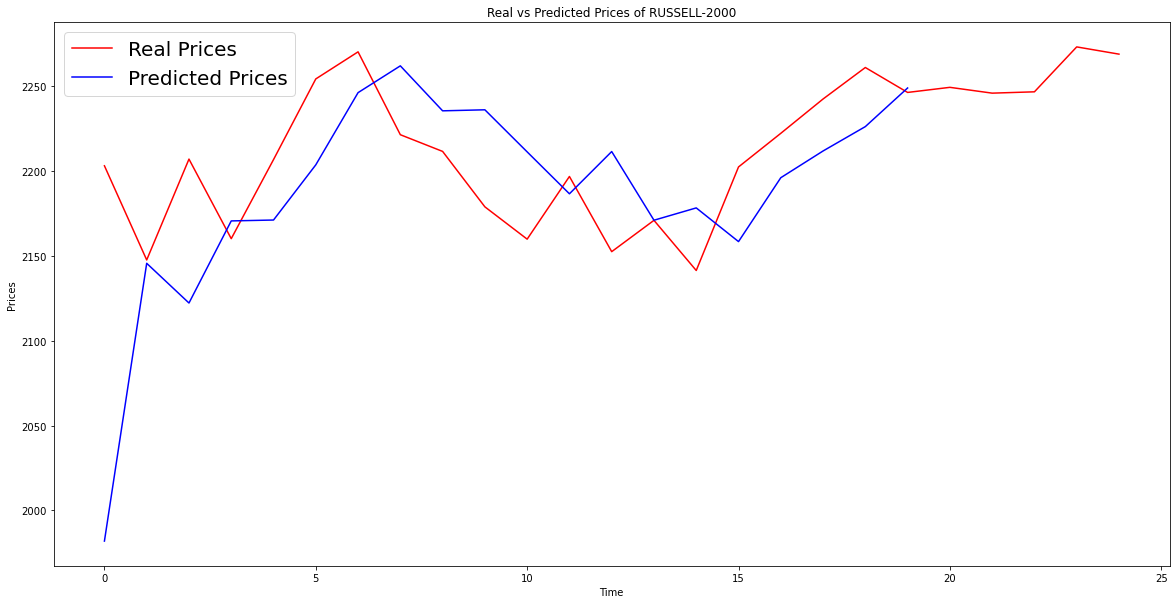

In [20]:
plt.figure(figsize=(20,10))
plt.plot(test_open,'red',label='Real Prices')
plt.plot(predicted_value,'blue',label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.title('Real vs Predicted Prices of RUSSELL-2000')
plt.legend(loc='best', fontsize=20)